In [1]:
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import roc_curve, precision_recall_curve 

Using TensorFlow backend.


initial seed values are 7, 63, 777, 1024, 9999 for NN__1, NN__2, NN__3, NN__4, NN__5

In [2]:
diff1 = np.load('new_diff1.npy')
diff0 = np.load('new_diff0.npy')

CH11 = np.load('new_ch1_c.npy')
CH10 = np.load('new_ch0_c.npy')

diff1_t = np.load('new_diff1_t.npy')
diff0_t = np.load('new_diff0_t.npy')
CH11_t = np.load('new_ch1_t.npy')
CH10_t = np.load('new_ch0_t.npy')
combined1 = np.c_[diff1_t, CH11_t]
combined0 = np.c_[diff0_t, CH10_t]

In [3]:
len(diff1), len(diff0)

(4920322, 1924741)

In [4]:
len(CH11), len(CH10)

(5004258, 27496352)

In [5]:
len(combined1), len(combined0)

(4920323, 313811)

In [6]:

trues = np.array(len(diff1)*[1])
falses = np.array(len(diff0)*[0])

trues_c = np.array(len(CH11)*[1])
falses_c = np.array(len(CH10)*[0])

trues_t = np.array(len(combined1)*[1])
falses_t = np.array(len(combined0)*[0])

In [7]:
np.shape(combined1)

(4920323, 15)

In [8]:
train_number_signal = int(np.rint(len(diff1)*0.8))   
validation_number_signal = int(np.rint(len(diff1)*0.1))
#test_number_signal = len(diff1)-train_number_signal-validation_number_signal
test_number_signal = len(diff1)

train_number_background = int(np.rint(len(diff0)*0.8))
validation_number_background = int(np.rint(len(diff0)*0.1))
#test_number_background = len(diff0)-train_number_background-validation_number_background
test_number_background = len(diff0)

In [9]:
train_number_signal_c = int(np.rint(len(CH11)*0.8))   
validation_number_signal_c = int(np.rint(len(CH11)*0.1))
#test_number_signal_c = len(CH11)-train_number_signal_c-validation_number_signal_c
test_number_signal_c = len(CH11)

train_number_background_c = int(np.rint(len(CH10)*0.8))
validation_number_background_c = int(np.rint(len(CH10)*0.1))
#test_number_background_c = len(CH10)-train_number_background_c-validation_number_background_c
test_number_background_c = len(CH10)

In [10]:
train_number_signal_t = int(np.rint(len(combined1)*0.8))   
validation_number_signal_t = int(np.rint(len(combined1)*0.1))
#test_number_signal_t = len(combined1)-train_number_signal_t-validation_number_signal_t
test_number_signal_t = len(combined1)

train_number_background_t = int(np.rint(len(combined0)*0.8))
validation_number_background_t = int(np.rint(len(combined0)*0.1))
#test_number_background_t = len(combined0)-train_number_background_t-validation_number_background_t
test_number_background_t = len(combined0)

In [11]:
np.random.seed(0)
indices_1 = np.random.permutation(len(diff1))
indices_c1 = np.random.permutation(len(CH11))
indices_t1 = np.random.permutation(len(combined1))

train_c1 = CH11[indices_c1[:train_number_signal_c]]
#test_c1 = CH11[indices_c1[train_number_signal_c+validation_number_signal_c:]]
test_c1 = CH11[indices_c1[0:]]
validate_c1 = CH11[indices_c1[train_number_signal_c:train_number_signal_c+validation_number_signal_c]]

train_1 = diff1[indices_1[:train_number_signal]]
#test_1 = diff1[indices_1[train_number_signal+validation_number_signal:]]
test_1 = diff1[indices_1[0:]]
validate_1 = diff1[indices_1[train_number_signal:train_number_signal+validation_number_signal]]

train_t1 = combined1[indices_t1[:train_number_signal_t]]
#test_t1 = combined1[indices_t1[train_number_signal_t+validation_number_signal_t:]]
test_t1 = combined1[indices_t1[0:]]
validate_t1 = combined1[indices_t1[train_number_signal_t:train_number_signal_t+validation_number_signal_t]]

In [12]:
np.random.seed(1)
indices_0 = np.random.permutation(len(diff0))
indices_c0 = np.random.permutation(len(CH10))
indices_t0 = np.random.permutation(len(combined0))


train_c0 = CH10[indices_c0[:train_number_background_c]]
#test_c0 = CH10[indices_c0[train_number_background_c+validation_number_background_c:]]
test_c0 = CH10[indices_c0[0:]]
validate_c0 = CH10[indices_c0[train_number_background_c:train_number_background_c+validation_number_background_c]]

train_0 = diff0[indices_0[:train_number_background]]
#test_0 = diff0[indices_0[train_number_background+validation_number_background:]]
test_0 = diff0[indices_0[0:]]
validate_0 = diff0[indices_0[train_number_background:train_number_background+validation_number_background]]

train_t0 = combined0[indices_t0[:train_number_background_t]]
#test_t0 = combined0[indices_t0[train_number_background_t+validation_number_background_t:]]
test_t0 = combined0[indices_t0[0:]]
validate_t0 = combined0[indices_t0[train_number_background_t:train_number_background_t+validation_number_background_t]]

In [13]:
trues_train = trues[indices_1[:train_number_signal]]
#trues_test = trues[indices_1[train_number_signal+validation_number_signal:]]
trues_test = trues[indices_1[0:]]
trues_validate = trues[indices_1[train_number_signal:train_number_signal+validation_number_signal]]

falses_train = falses[indices_0[:train_number_background]]
#falses_test = falses[indices_0[train_number_background+validation_number_background:]]
falses_test = falses[indices_0[0:]]
falses_validate = falses[indices_0[train_number_background:train_number_background+validation_number_background]]


trues_train_c = trues_c[indices_c1[:train_number_signal_c]]
#trues_test_c = trues_c[indices_c1[train_number_signal_c+validation_number_signal_c:]]
trues_test_c = trues_c[indices_c1[0:]]
trues_validate_c = trues_c[indices_c1[train_number_signal_c:train_number_signal_c+validation_number_signal_c]]

falses_train_c = falses_c[indices_c0[:train_number_background_c]]
#falses_test_c = falses_c[indices_c0[train_number_background_c+validation_number_background_c:]]
falses_test_c = falses_c[indices_c0[0:]]
falses_validate_c = falses_c[indices_c0[train_number_background_c:train_number_background_c+validation_number_background_c]]


trues_train_t = trues_t[indices_t1[:train_number_signal_t]]
#trues_test_t = trues_t[indices_t1[train_number_signal_t+validation_number_signal_t:]]
trues_test_t = trues_t[indices_t1[0:]]
trues_validate_t = trues_t[indices_t1[train_number_signal_t:train_number_signal_t+validation_number_signal_t]]

falses_train_t = falses_t[indices_t0[:train_number_background_t]]
#falses_test_t = falses_t[indices_t0[train_number_background_t+validation_number_background_t:]]
falses_test_t = falses_t[indices_t0[0:]]
falses_validate_t = falses_t[indices_t0[train_number_background_t:train_number_background_t+validation_number_background_t]]

In [14]:
train = np.array(list(train_1) + list(train_0))
test = np.array(list(test_1) + list(test_0))
validate = np.array(list(validate_1) + list(validate_0))

train_c = np.array(list(train_c1) + list(train_c0))
test_c = np.array(list(test_c1) + list(test_c0))
validate_c = np.array(list(validate_c1) + list(validate_c0))

train_total = np.array(list(train_t1) + list(train_t0))
test_total = np.array(list(test_t1) + list(test_t0))
validate_total = np.array(list(validate_t1) + list(validate_t0))

indicator_train = np.array(list(trues_train) + list(falses_train))
indicator_test = np.array(list(trues_test) + list(falses_test))
indicator_validate = np.array(list(trues_validate) + list(falses_validate))

indicator_train_c = np.array(list(trues_train_c) + list(falses_train_c))
indicator_test_c = np.array(list(trues_test_c) + list(falses_test_c))
indicator_validate_c = np.array(list(trues_validate_c) + list(falses_validate_c))

indicator_train_t = np.array(list(trues_train_t) + list(falses_train_t))
indicator_test_t = np.array(list(trues_test_t) + list(falses_test_t))
indicator_validate_t = np.array(list(trues_validate_t) + list(falses_validate_t))

In [15]:
model_clasify_1 = load_model('fff_model_clasify_cut-11-98__1.h5')
model_clasify_c_1 = load_model('fff_model_clasify_c_cut-11-98__1.h5')
model_clasify_t_1 = load_model('fff_model_clasify_t_cut-11-98__1.h5')

model_clasify_2 = load_model('fff_model_clasify_cut-11-98__2.h5')
model_clasify_c_2 = load_model('fff_model_clasify_c_cut-11-98__2.h5')
model_clasify_t_2 = load_model('fff_model_clasify_t_cut-11-98__2.h5')


model_clasify_3 = load_model('fff_model_clasify_cut-11-98__3.h5')
model_clasify_c_3 = load_model('fff_model_clasify_c_cut-11-98__3.h5')
model_clasify_t_3 = load_model('fff_model_clasify_t_cut-11-98__3.h5')


model_clasify_4 = load_model('fff_model_clasify_cut-11-98__4.h5')
model_clasify_c_4 = load_model('fff_model_clasify_c_cut-11-98__4.h5')
model_clasify_t_4 = load_model('fff_model_clasify_t_cut-11-98__4.h5')


model_clasify_5 = load_model('fff_model_clasify_cut-11-98__5.h5')
model_clasify_c_5 = load_model('fff_model_clasify_c_cut-11-98__5.h5')
model_clasify_t_5 = load_model('fff_model_clasify_t_cut-11-98__5.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [16]:
predictions_clasify_1 = model_clasify_1.predict(test)
predictions_clasify_c_1 = model_clasify_c_1.predict(test_c)
predictions_clasify_t_1 = model_clasify_t_1.predict(test_total)

predictions_clasify_2 = model_clasify_2.predict(test)
predictions_clasify_c_2 = model_clasify_c_2.predict(test_c)
predictions_clasify_t_2 = model_clasify_t_2.predict(test_total)

predictions_clasify_3 = model_clasify_3.predict(test)
predictions_clasify_c_3 = model_clasify_c_3.predict(test_c)
predictions_clasify_t_3 = model_clasify_t_3.predict(test_total)

predictions_clasify_4 = model_clasify_4.predict(test)
predictions_clasify_c_4 = model_clasify_c_4.predict(test_c)
predictions_clasify_t_4 = model_clasify_t_4.predict(test_total)

predictions_clasify_5 = model_clasify_5.predict(test)
predictions_clasify_c_5 = model_clasify_c_5.predict(test_c)
predictions_clasify_t_5 = model_clasify_t_5.predict(test_total)

In [17]:
predictions_clasify = np.array([(i + j + k + m + n)/5 for i, j, k, m, n in zip(predictions_clasify_1, predictions_clasify_2, predictions_clasify_3, predictions_clasify_4, predictions_clasify_5)])

predictions_clasify_c = np.array([(i + j + k + m + n)/5 for i, j, k, m, n in zip(predictions_clasify_c_1, predictions_clasify_c_2, predictions_clasify_c_3, predictions_clasify_c_4, predictions_clasify_c_5)])

predictions_clasify_t = np.array([(i + j + k + m + n)/5 for i, j, k, m, n in zip(predictions_clasify_t_1, predictions_clasify_t_2, predictions_clasify_t_3, predictions_clasify_t_4, predictions_clasify_t_5)])


In [18]:
fpr_clasify, tpr_clasify, _ = roc_curve(indicator_test, predictions_clasify)
fpr_clasify_c, tpr_clasify_c, _ = roc_curve(indicator_test_c, predictions_clasify_c)
fpr_clasify_t, tpr_clasify_t, _ = roc_curve(indicator_test_t, predictions_clasify_t)


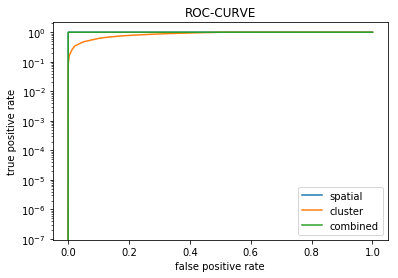

In [19]:
plt.plot(fpr_clasify, tpr_clasify)
plt.plot(fpr_clasify_c, tpr_clasify_c)
plt.plot(fpr_clasify_t, tpr_clasify_t)
plt.yscale('log')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(['spatial', 'cluster', 'combined'])
plt.title('ROC-CURVE')
plt.savefig('roc curve.pdf', bbox_inches='tight')

In [20]:
a_ = []
for i in fpr_clasify:
    if i == 0:
        a_.append(test_number_background)
    else:
        a_.append(1.0/i)
        
b_ = []
for i in fpr_clasify_c:
    if i == 0:
        b_.append(test_number_background_c)
    else:
        b_.append(1.0/i)

c_ = []
for i in fpr_clasify_t:
    if i == 0:
        c_.append(test_number_background_t)
    else:
        c_.append(1.0/i)

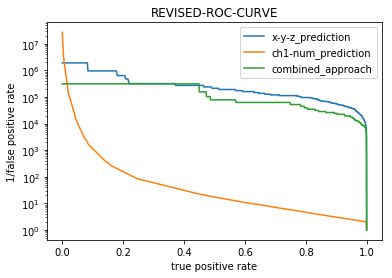

In [21]:
plt.plot(tpr_clasify, np.array(a_))
plt.plot(tpr_clasify_c, np.array(b_))
plt.plot(tpr_clasify_t, np.array(c_))
plt.xlabel('true positive rate')
plt.ylabel('1/false positive rate')
plt.legend(['x-y-z_prediction', 'ch1-num_prediction', 'combined_approach'])
plt.title('REVISED-ROC-CURVE')
plt.yscale('log')

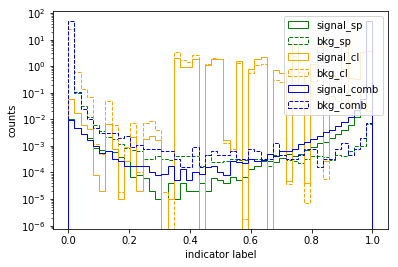

In [22]:
bb = np.linspace(0, 1, 50)
plt.hist(predictions_clasify[:len(trues_test)], histtype='step', color='green', label='signal_sp', density=True, bins = bb)
plt.hist(predictions_clasify[len(trues_test):], histtype='step', color='green', linestyle='dashed', label='bkg_sp', density =True, bins = bb)
plt.hist(predictions_clasify_c[:len(trues_test_c)], histtype='step', color='orange', label='signal_cl', density =True, bins = bb)
plt.hist(predictions_clasify_c[len(trues_test_c):], histtype='step', color='orange', linestyle='dashed', label='bkg_cl', density =True, bins = bb)
plt.hist(predictions_clasify_t[:len(trues_test_t)], histtype='step', color='blue', label='signal_comb', density =True, bins = bb)
plt.hist(predictions_clasify_t[len(trues_test_t):], histtype='step', color='blue', linestyle='dashed', label='bkg_comb', density =True, bins = bb)
plt.yscale('log')
plt.xlabel('indicator label')
plt.ylabel('counts')
plt.legend()
plt.savefig('prediction score distribution.pdf', bbox_inches='tight')

In [23]:
f1 = pd.read_pickle('ideal_final_data_cut.pkl')
f2 = pd.read_pickle('ideal_final_data2_cut.pkl')
f3 = pd.read_pickle('ideal_final_data3_cut.pkl')
f4 = pd.read_pickle('ideal_final_data4_cut.pkl')
f5 = pd.read_pickle('ideal_final_data5_cut.pkl')
f6 = pd.read_pickle('ideal_final_data6_cut.pkl')
f7 = pd.read_pickle('ideal_final_data7_cut.pkl')
f8 = pd.read_pickle('ideal_final_data8_cut.pkl')
f9 = pd.read_pickle('ideal_final_data9_cut.pkl')
f10 = pd.read_pickle('ideal_final_data10_cut.pkl')
f11 = pd.read_pickle('ideal_final_data11_cut.pkl')
f12 = pd.read_pickle('ideal_final_data12_cut.pkl')
f13 = pd.read_pickle('ideal_final_data13_cut.pkl')
f14 = pd.read_pickle('ideal_final_data14_cut.pkl')
f15 = pd.read_pickle('ideal_final_data15_cut.pkl')
f161 = pd.read_pickle('ideal_final_data161_cut.pkl')
f162 = pd.read_pickle('ideal_final_data162_cut.pkl')

f17 = pd.read_pickle('ideal_final_data17_cut.pkl')
f18 = pd.read_pickle('ideal_final_data18_cut.pkl')
f19 = pd.read_pickle('ideal_final_data19_cut.pkl')
f20 = pd.read_pickle('ideal_final_data20_cut.pkl')
f21 = pd.read_pickle('ideal_final_data21_cut.pkl')
f22 = pd.read_pickle('ideal_final_data22_cut.pkl')
f23 = pd.read_pickle('ideal_final_data23_cut.pkl')
f24 = pd.read_pickle('ideal_final_data24_cut.pkl')
f25 = pd.read_pickle('ideal_final_data25_cut.pkl')
f26 = pd.read_pickle('ideal_final_data26_cut.pkl')
f27 = pd.read_pickle('ideal_final_data27_cut.pkl')
f = pd.concat([f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f14, f15, f161, f162, f17, f18, f19, f20, f21, f22, f23, f24, f25, f26, f27])
f

,event_id,hit_id,eta,layer_id,module_id,nch0,nch1,particle_id,tpx,tpy,tpz,volume_id,x,y,z
20042,1000,20043.0,-0.372461,2.0,97.0,3.0,2.0,1.080958e+17,-2.771100,-0.023715,-1.515780,8.0,-33.674000,-0.446628,-12.835400
21826,1000,21827.0,-0.364603,2.0,112.0,1.0,2.0,1.080958e+17,-2.771340,-0.024289,-1.515410,8.0,-32.010101,-0.440721,-11.932400
29668,1000,29669.0,-0.455122,4.0,193.0,3.0,2.0,1.080958e+17,-2.770970,0.000340,-1.514780,8.0,-73.471901,-0.615863,-34.606300
30703,1000,30704.0,-0.453312,4.0,224.0,1.0,3.0,1.080958e+17,-2.770980,-0.001129,-1.515090,8.0,-71.580399,-0.604620,-33.572201
37345,1000,37346.0,-0.480718,6.0,313.0,2.0,2.0,1.080958e+17,-2.768900,0.027852,-1.513700,8.0,-117.384003,-0.393283,-58.627499
38162,1000,38163.0,-0.479987,6.0,364.0,2.0,2.0,1.080958e+17,-2.768750,0.026067,-1.514100,8.0,-115.445999,-0.404245,-57.565300
43651,1000,43652.0,-0.494011,8.0,391.0,2.0,2.0,1.080958e+17,-2.768500,0.058717,-1.512330,8.0,-172.957001,0.472070,-88.960899
44183,1000,44184.0,-0.493657,8.0,468.0,2.0,3.0,1.080958e+17,-2.768770,0.057969,-1.511960,8.0,-170.962006,0.427640,-87.866699
20043,1000,20044.0,-1.095952,2.0,97.0,2.0,5.0,5.944780e+17,-0.319480,0.002672,-0.442060,8.0,-34.331402,1.433860,-45.662899
21914,1000,21915.0,-1.093295,2.0,112.0,1.0,5.0,5.944780e+17,-0.319730,0.004456,-0.442086,8.0,-31.905899,1.406340,-42.300098


In [24]:
ha = 60000000/33652695375
number_of_events = len(f['event_id'].unique())
#per event based purity. TPR & FPR will not change either per event or not, if not per event based, excluding ha and number_of_events terms in the last part of its calculation.
def purity_evaluation(tpr, fpr):
    purity = []
    for i in range(len(tpr)):
        if tpr[i] == 0:
            purity.append(0)
        else:
            purity.append(1/(1+fpr[i]/tpr[i]*(len(falses_test)/ha)/(len(trues_test)/number_of_events)))
    return np.array(purity)

def purity_evaluation_c(tpr, fpr):
    purity = []
    for i in range(len(tpr)):
        if tpr[i] == 0:
            purity.append(0)
        else:
            purity.append(1/(1+fpr[i]/tpr[i]*(len(falses_test_c)/ha)/(len(trues_test_c)/number_of_events)))
    return np.array(purity)

def purity_evaluation_t(tpr, fpr):
    purity = []
    for i in range(len(tpr)):
        if tpr[i] == 0:
            purity.append(0)
        else:
            purity.append(1/(1+fpr[i]/tpr[i]*(len(falses_test_t)/ha)/(len(trues_test_t)/number_of_events)))
    return np.array(purity)

In [25]:
number_of_events

1650

In [26]:
haha = np.array([1/ha] * len(falses_test))
hehe = np.array([1/number_of_events] * len(trues_test))
weights = np.array(list(hehe) + list(haha))
weights

array([6.06060606e-04, 6.06060606e-04, 6.06060606e-04, ...,
       5.60878256e+02, 5.60878256e+02, 5.60878256e+02])

In [27]:
haha_c = np.array([1/ha] * len(falses_test_c))
hehe_c = np.array([1/number_of_events] * len(trues_test_c))
weights_c = np.array(list(hehe_c) + list(haha_c))

haha_t = np.array([1/ha] * len(falses_test_t))
hehe_t = np.array([1/number_of_events] * len(trues_test_t))
weights_t = np.array(list(hehe_t) + list(haha_t))

In [28]:
pure_clasify = purity_evaluation(tpr_clasify, fpr_clasify)
pure_clasify_c = purity_evaluation_c(tpr_clasify_c, fpr_clasify_c)
pure_clasify_t = purity_evaluation_t(tpr_clasify_t, fpr_clasify_t)

Text(0.5, 1.0, 'Efficiency vs Purity')

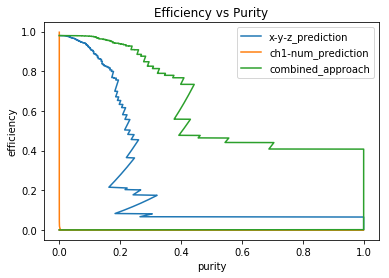

In [29]:
plt.plot(pure_clasify, tpr_clasify*0.9799997530243563)
plt.plot(pure_clasify_c, tpr_clasify_c*0.9967176140240738)
plt.plot(pure_clasify_t, tpr_clasify_t*0.9799999521982625)

plt.ylabel('efficiency')
plt.xlabel('purity')
plt.legend(['x-y-z_prediction', 'ch1-num_prediction', 'combined_approach'])
plt.title('Efficiency vs Purity')

In [30]:
pur, eff, thr = precision_recall_curve(indicator_test, predictions_clasify, sample_weight = weights)
pur_c, eff_c, thr_c = precision_recall_curve(indicator_test_c, predictions_clasify_c, sample_weight = weights_c)
pur_t, eff_t, thr_t = precision_recall_curve(indicator_test_t, predictions_clasify_t, sample_weight = weights_t)

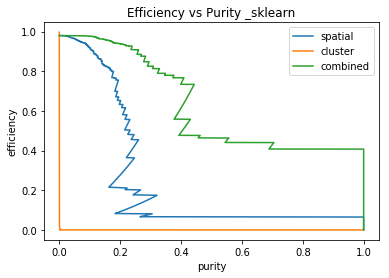

In [31]:
plt.plot(pur, eff*0.9799997530243563)
plt.plot(pur_c, eff_c*0.9967176140240738)
plt.plot(pur_t, eff_t*0.9799999521982625)
plt.ylabel('efficiency')
plt.xlabel('purity')
plt.legend(['spatial', 'cluster', 'combined'])
plt.title('Efficiency vs Purity _sklearn')
plt.savefig('purity vs efficiency.pdf', bbox_inches='tight')